In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('sign_mnist_train.csv')

In [4]:
df.shape

(27455, 785)

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
x = df.loc[:, df.columns!='label']
y = df['label']

In [8]:
print(x.shape)
print(y.shape)
print(type(x))

(27455, 784)
(27455,)
<class 'pandas.core.frame.DataFrame'>


In [9]:
x2 = x.values
print(type(x2))
print(x2.shape)

<type 'numpy.ndarray'>
(27455, 784)


In [10]:
y2 = y.values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [12]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0, random_state = 0)

In [13]:
train_y.shape

(27455,)

In [14]:
df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

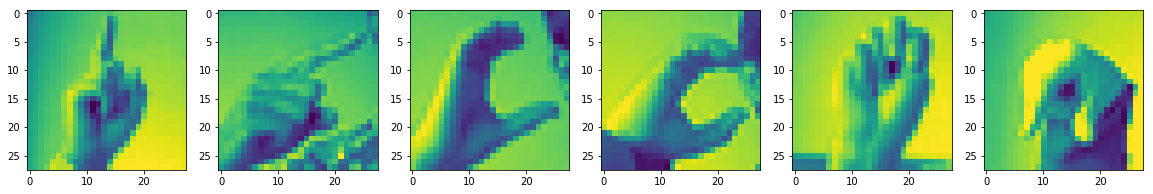

In [15]:
plt.figure(figsize = (20, 4))
for index, (image,label) in enumerate(zip(x2[0:6], y2[0:6])):
    plt.subplot(1,6,index+1)
    plt.imshow(np.reshape(image, (28,28)))

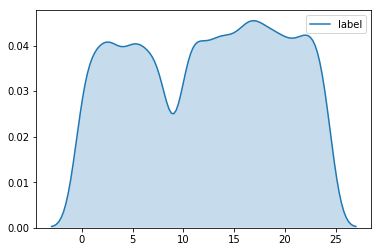

In [16]:
sns.kdeplot(y, shade = True)

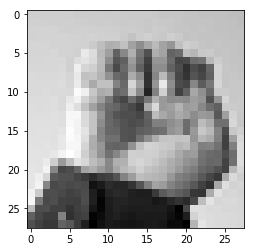

In [17]:
imag = x2[27427]
imag.shape = (28, 28)
plt.subplot(1, 1, 1)
plt.imshow(imag, cmap = plt.cm.gray)

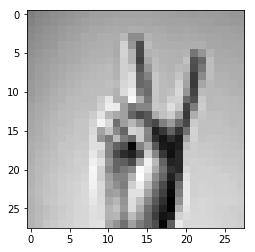

In [18]:
imag = x2[27426]
imag.shape = (28, 28)
plt.subplot(1, 1, 1)
plt.imshow(imag, cmap = plt.cm.gray)

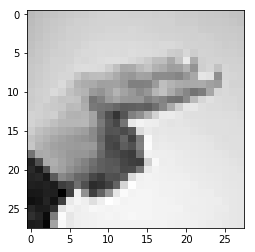

In [19]:
imag = x2[27400]
imag.shape = (28, 28)
plt.subplot(1, 1, 1)
plt.imshow(imag, cmap = plt.cm.gray)

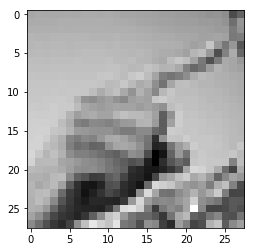

In [20]:
imag = x2[1]
imag.shape = (28, 28)
plt.subplot(1, 1, 1)
plt.imshow(imag, cmap = plt.cm.gray)

In [21]:
from sklearn.model_selection import  train_test_split
train_x, test_x, train_y, test_y = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [22]:
#PCA is a dimensionality reduction technique that can be used for data compression to speed up learning algorithms as well as for visualizations of complex datasets.
from sklearn import decomposition
pca = decomposition.PCA()

In [23]:
pca.n_components = 2
pca_data = pca.fit_transform(x)

print("Reduced PCA shape = ", pca_data.shape)

('Reduced PCA shape = ', (27455, 2))


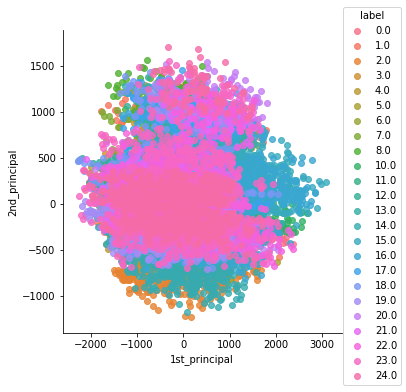

In [24]:
# attaching the label for each 2-d data point 
pca_dat = np.vstack((pca_data.T, y)).T

pca_df = pd.DataFrame(data = pca_dat, columns = ("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data = pca_df, hue = 'label', fit_reg = False)
plt.show()

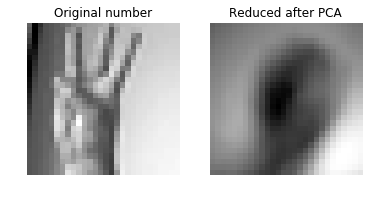

In [25]:
import matplotlib
imag = x2[7]
imag.shape = (28, 28)

a = plt.subplot(1, 2, 1)
a.set_title('Original number')
plt.imshow(imag, cmap = plt.cm.gray)
plt.axis("off")

imag = pca.inverse_transform(pca_data[7])
imag.shape = (28, 28)

b = plt.subplot(1, 2, 2)
b.set_title('Reduced after PCA')
plt.imshow(imag, cmap = plt.cm.gray)
plt.axis("off")
plt.show()

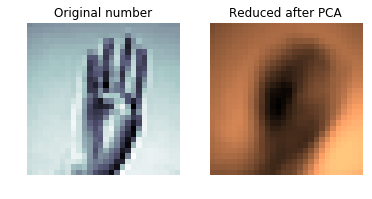

In [26]:
import matplotlib
imag = x2[29]
imag.shape = (28, 28)

a = plt.subplot(1, 2, 1)
a.set_title('Original number')
plt.imshow(imag, cmap = plt.cm.bone)
plt.axis("off")

imag = pca.inverse_transform(pca_data[7])
imag.shape = (28, 28)

b = plt.subplot(1, 2, 2)
b.set_title('Reduced after PCA')
plt.imshow(imag, cmap = plt.cm.copper)
plt.axis("off")
plt.show()

In [ ]:
#t-SNE (T-Distributed Stochastic Neighbouring Entities)
# t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction 
# and is particularly well suited for the visualization of high-dimensional datasets.
# Contrary to PCA it is not a mathematical technique but a probablistic one.

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(x)
#TSNE=tsne.fit_transform(x)
print(tsne.shape)

In [ ]:
tsne_data = np.vstack((tsne.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data=tsne_df, hue='label', fit_reg=False)
plt.show()

In [ ]:
#Data Modelling using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
ini = datetime.datetime.now()
model.fit(train_x, train_y)
fin = datetime.datetime.now()
